In [1]:
import pandas as pd
df=pd.read_csv("level_coding_siswa_150.csv")
df

,hours_coding_daily,preferred_language,typing_speed,import_usage,oop_usage,level
0,4.0,Python,44,Yes,Yes,Advanced
1,5.0,C++,59,Yes,Yes,Advanced
2,5.0,Python,55,Yes,Yes,Advanced
3,5.0,Python,59,Yes,Yes,Advanced
4,5.0,Python,55,Yes,Yes,Advanced
...,...,...,...,...,...,...
169,2.5,C++,40,No,No,Intermediate
170,4.0,Python,48,Yes,Yes,Intermediate
171,5.0,C++,34,Yes,Yes,Intermediate
172,3.5,Java,45,Yes,No,Intermediate


In [2]:
df.shape

(174, 6)

In [3]:
df.columns

Index(['hours_coding_daily', 'preferred_language', 'typing_speed',
       'import_usage', 'oop_usage', 'level'],
      dtype='object')

In [4]:
df.sample()

,hours_coding_daily,preferred_language,typing_speed,import_usage,oop_usage,level
106,2.5,Python,23,No,No,Beginner


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174 entries, 0 to 173
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   hours_coding_daily  174 non-null    float64
 1   preferred_language  174 non-null    object 
 2   typing_speed        174 non-null    int64  
 3   import_usage        174 non-null    object 
 4   oop_usage           174 non-null    object 
 5   level               174 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 8.3+ KB


In [6]:
df.describe()

,hours_coding_daily,typing_speed
count,174.000000,174.000000
mean,3.215517,38.810345
std,1.299551,14.306864
min,1.000000,20.000000
25%,2.000000,25.250000
50%,3.000000,38.000000
75%,4.000000,50.000000
max,5.500000,65.000000


In [7]:
df.head()

,hours_coding_daily,preferred_language,typing_speed,import_usage,oop_usage,level
0,4.0,Python,44,Yes,Yes,Advanced
1,5.0,C++,59,Yes,Yes,Advanced
2,5.0,Python,55,Yes,Yes,Advanced
3,5.0,Python,59,Yes,Yes,Advanced
4,5.0,Python,55,Yes,Yes,Advanced


In [8]:
df.tail()

,hours_coding_daily,preferred_language,typing_speed,import_usage,oop_usage,level
169,2.5,C++,40,No,No,Intermediate
170,4.0,Python,48,Yes,Yes,Intermediate
171,5.0,C++,34,Yes,Yes,Intermediate
172,3.5,Java,45,Yes,No,Intermediate
173,3.0,C++,38,Yes,No,Intermediate


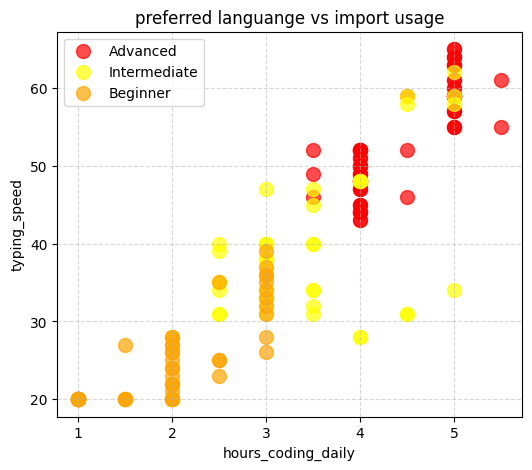

In [13]:
import matplotlib.pyplot as plt
advanced=df[df["level"]=="Advanced"]
intermediate=df[df["level"]=="Intermediate"]
beginner=df[df["level"]=="Beginner"]
plt.figure(figsize=(6,5))

plt.scatter(advanced["hours_coding_daily"], advanced ["typing_speed"], s=100, alpha=0.7, color="red", label="Advanced")
plt.scatter(intermediate["hours_coding_daily"], intermediate ["typing_speed"], s=100, alpha=0.7,color="yellow",label="Intermediate")
plt.scatter(beginner["hours_coding_daily"], beginner["typing_speed"], s=100, alpha=0.7,color="orange",label="Beginner")

plt.xlabel("hours_coding_daily")
plt.ylabel("typing_speed")
plt.title("preferred languange vs import usage")
plt.legend()
plt.grid(True ,linestyle="--", alpha=0.5)
plt.show()

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

X=df[["hours_coding_daily", "preferred_language", "typing_speed", "import_usage", "oop_usage"]]
y=df["level"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

numeric_columns=["hours_coding_daily", "typing_speed"]
categorical_columns=["preferred_language", "import_usage", "oop_usage"]

preprocessing = ColumnTransformer(
    transformers=[
        ("scaler", StandardScaler(), numeric_columns),
        ("ohe", OneHotEncoder(), categorical_columns)
    ]
)

model = Pipeline(steps=[
        ("preprocessing", preprocessing),
        ("model", RandomForestClassifier())
    ]
)

model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test,y_pred))
print("\nClassification Report\n", classification_report(y_test,y_pred))
print("\nConfusion Matrix\n", accuracy_score(y_test,y_pred))

scores = cross_val_score(model, X_train, y_train, cv=5, scoring="accuracy")
print("Score:", scores)
print("\nScore Mean\n:", scores.mean())

Accuracy: 0.8490566037735849

Classification Report
               precision    recall  f1-score   support

    Advanced       0.79      0.95      0.86        20
    Beginner       0.94      0.94      0.94        16
Intermediate       0.85      0.65      0.73        17

    accuracy                           0.85        53
   macro avg       0.86      0.84      0.84        53
weighted avg       0.85      0.85      0.84        53


Confusion Matrix
 0.8490566037735849
Score: [1.         0.91666667 0.79166667 0.91666667 0.875     ]

Score Mean
: 0.9


In [15]:
import joblib
joblib.dump(model, "klasifikasi_coding.joblib")

['klasifikasi_coding.joblib']